# Model 1 - Forecast Survival Rate in the Titanic

### import libraries

In [384]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

In [385]:
# install library to a specific env

#conda install -n py37 seaborn -y

### get data

In [386]:
# path to files in folder

test = "/Users/albertovisona/Desktop/Applications/MIT_xPRO/Projects/Titanic Data/titanic_test.csv"
train = "/Users/albertovisona/Desktop/Applications/MIT_xPRO/Projects/Titanic Data/titanic_train.csv"

In [387]:
# load data

train = pd.read_csv(train)

**Variable Notes**

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: # of siblings / spouses aboard the Titanic.
The dataset defines family relations in this way...

1. Sibling = brother, sister, stepbrother, stepsister
2. Spouse = husband, wife (mistresses and fiancés were ignored)

parch: # of parents / children aboard the Titanic.
The dataset defines family relations in this way...
1. Parent = mother, father
2. Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

In [388]:
# get a first view on the data

print("Number of columns: " + str(train.shape[1]))
print("Number of rows: " + str(train.shape[0]))

Number of columns: 12
Number of rows: 891


In [389]:
# visualize first 5 rows of the dataset

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [390]:
# count the number of missing values

train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [391]:
# get the % of missing values for each column

round(train.isna().sum()/train.shape[0]*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

**Comments**: 

~ 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. 

~ 77 of the Cabin column is missing, this is too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

### Exploratory Data Analysis

<AxesSubplot:>

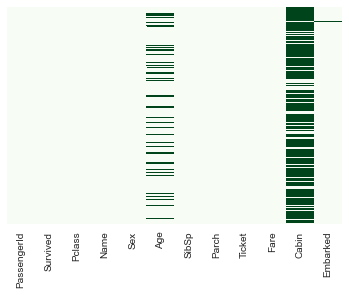

In [392]:
# dispaly missing values

sns.heatmap(train.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='Greens') # list of colors > https://matplotlib.org/stable/tutorials/colors/colormaps.html

<AxesSubplot:xlabel='Survived', ylabel='count'>

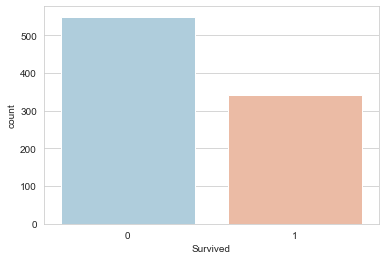

In [393]:
# display distribution of "Survived"

sns.set_style('whitegrid')
sns.countplot(x='Survived',
              data=train,
              palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

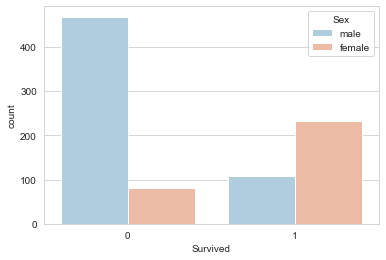

In [394]:
# display distribution of "Survived" by Sex

sns.set_style('whitegrid')
sns.countplot(x='Survived',
              hue='Sex',
              data=train,
              palette='RdBu_r')

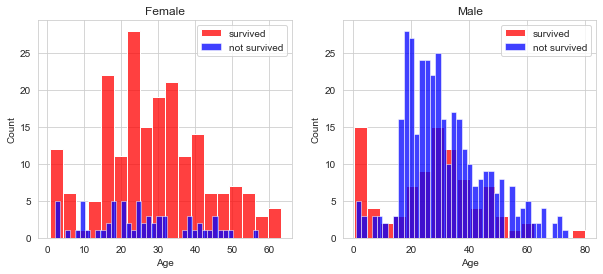

In [395]:
# display survival rate by "Age" and "Sex"

survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))

women = train[train['Sex']=='female']
men = train[train['Sex']=='male']

ax = sns.histplot(women[women['Survived']==1].Age.dropna(), 
                  bins=18, 
                  label = survived,
                  color = 'red',
                  ax = axes[0], 
                  kde =False)
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), 
                  bins=40, 
                  label = not_survived,
                  color = 'blue',
                  ax = axes[0], 
                  kde =False)
ax.legend()
ax.set_title('Female')

ax = sns.histplot(men[men['Survived']==1].Age.dropna(), 
                  bins=18, 
                  label = survived,
                  color = 'red',
                  ax = axes[1], 
                  kde = False)
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), 
                  bins=40,
                  label = not_survived,
                  color = 'blue',
                  ax = axes[1], 
                  kde = False)
ax.legend()
_ = ax.set_title('Male')

# different # of bins -> different width of the class

<AxesSubplot:xlabel='Survived', ylabel='count'>

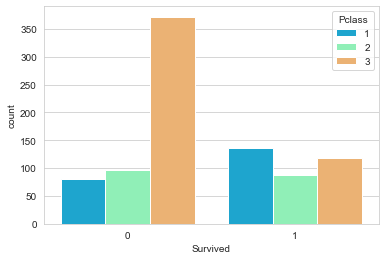

In [396]:
# display distribution of "Survived" by Cruise Class

sns.set_style('whitegrid')
sns.countplot(x='Survived',
              hue='Pclass',
              data=train,
              palette='rainbow')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

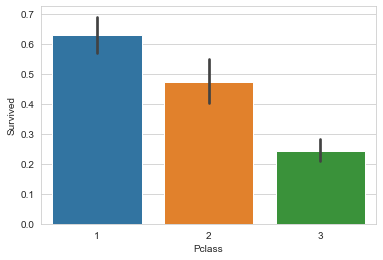

In [397]:
# display "Survived" percentage by Cruise Class

sns.barplot(x='Pclass', 
            y='Survived', 
            data=train)

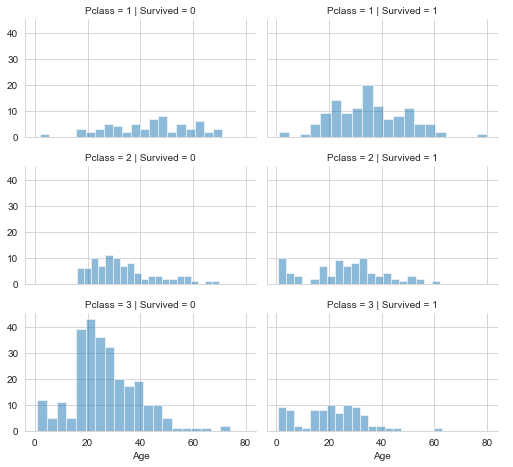

In [398]:
# get count of passengers by Class and Survival

grid = sns.FacetGrid(train, 
                     col='Survived', 
                     row='Pclass', 
                     height=2.2, 
                     aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

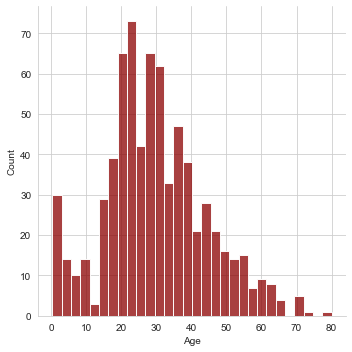

In [399]:
# display Age distribution

sns.displot(train['Age'].dropna(),
            kde=False,
            color='darkred',
            bins=30)

Text(0.5, 1.0, 'female')

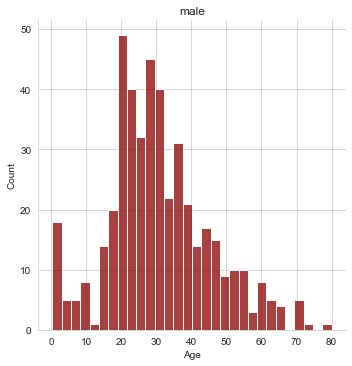

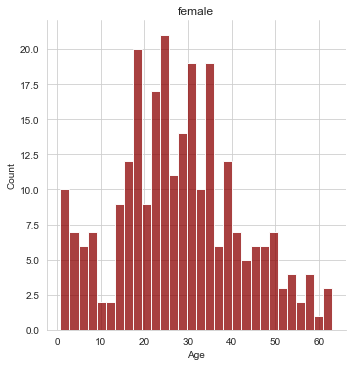

In [400]:
# display Age distribution by Sex

sns.displot(train[(train['Sex']=='male')]['Age'].dropna(),
            kde=False,
            color='darkred',
            bins=30)
plt.title('male')

sns.displot(train[(train['Sex']=='female')]['Age'].dropna(),
            kde=False,
            color='darkred',
            bins=30)
plt.title('female')

Text(0.5, 1.0, 'Survived')

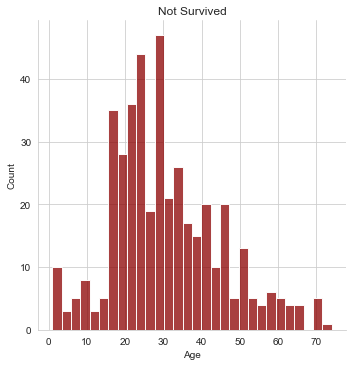

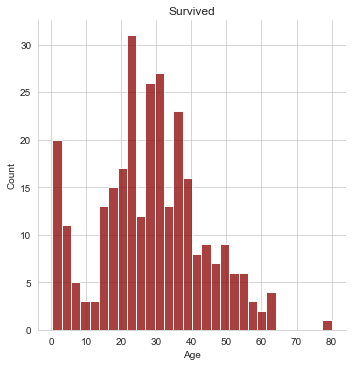

In [401]:
# display Age distribution by Survivorship

sns.displot(train[(train['Survived']==0)]['Age'].dropna(),
            kde=False,
            color='darkred',
            bins=30)
plt.title('Not Survived')

sns.displot(train[(train['Survived']==1)]['Age'].dropna(),
            kde=False,
            color='darkred',
            bins=30)
plt.title('Survived')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

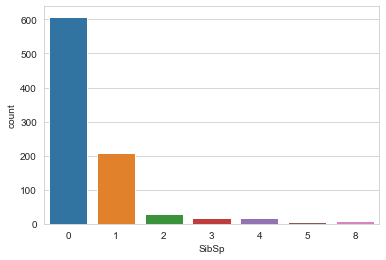

In [402]:
# Number of siblings distribution

sns.countplot(x='SibSp',
              data=train)

Text(0.5, 1.0, 'Fare')

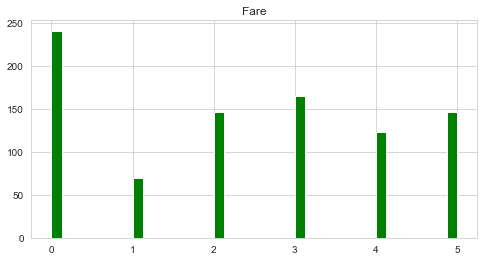

In [851]:
# Histogram the fare distribution. Bins on the x-axis and occurences on the y

train['Fare'].hist(color='green',
                   bins=40,
                   figsize=(8,4))
plt.title('Fare')

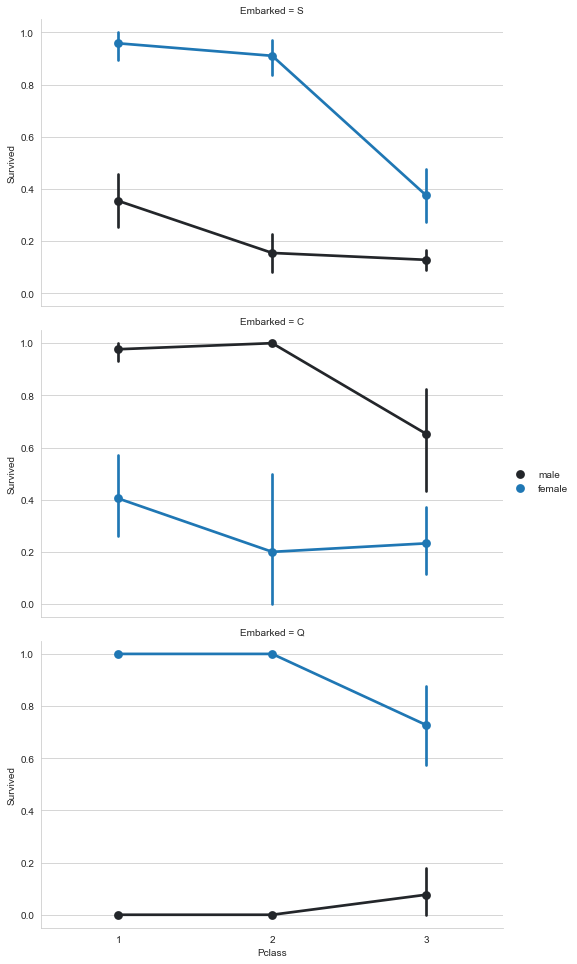

In [404]:
# get survival rate by Port (Embarked) and by Sex
# FacetGrid > Multi-plot grid for plotting conditional relationships.

FacetGrid = sns.FacetGrid(train, 
                          row='Embarked', 
                          height=4.5, 
                          aspect=1.6)
FacetGrid.map(sns.pointplot, 
              'Pclass', 'Survived', 'Sex', 
              palette=None,  
              order=None, 
              hue_order=None )
FacetGrid.add_legend()

### Data Cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

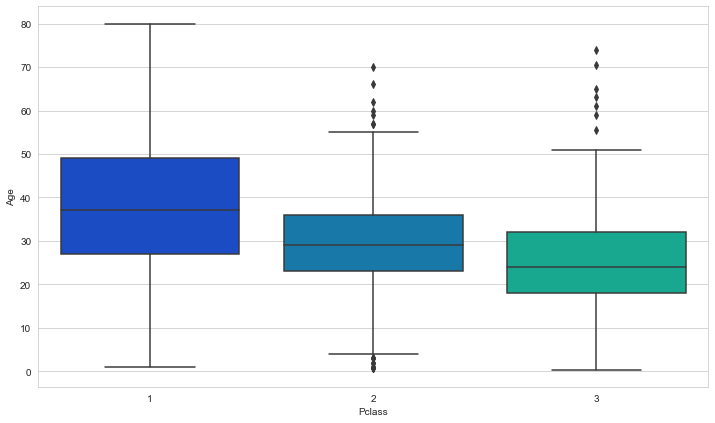

In [405]:
# fill in missing age data instead of just dropping the missing age data rows

plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',
            y='Age',
            data=train,
            palette='winter')

In [406]:
# get average age by class type

mean_1 = int(train[(train['Pclass']==1)]['Age'].mean())
mean_2 = int(train[(train['Pclass']==2)]['Age'].mean())
mean_3 = int(train[(train['Pclass']==3)]['Age'].mean())

print("mean class 1 is : {}".format(mean_1))
print("mean class 2 is : {}".format(mean_2))
print("mean class 3 is : {}".format(mean_3))

mean class 1 is : 38
mean class 2 is : 29
mean class 3 is : 25


In [407]:
# create a function to add the mean age by class to the empty values

def impute_age(cols, mean_1, mean_2, mean_3):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return mean_1

        elif Pclass == 2:
            return mean_2

        else:
            return mean_3

    else:
        return Age

In [408]:
# apply the function in the train dataset

train['Age'] = train[['Age','Pclass']].apply(impute_age,
                                             axis=1,
                                             args = (mean_1, mean_2, mean_3)) # args of the function

In [409]:
# check the total of null values

null_values = train['Age'].isnull().sum()
print('Number of Null values is: {}'.format(null_values))

Number of Null values is: 0


<AxesSubplot:>

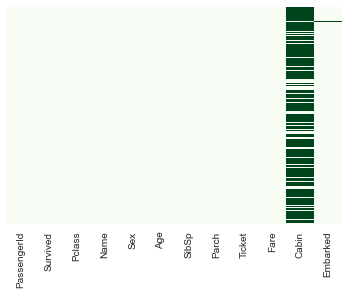

In [410]:
# plot the number of missing values for the whole dataset

sns.heatmap(train.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='Greens')

In [411]:
# drop the "Cabin" variable as it has too many null values

train.drop('Cabin',
           axis=1,
           inplace=True)

In [412]:
# check that the column has been dropped

train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


<AxesSubplot:>

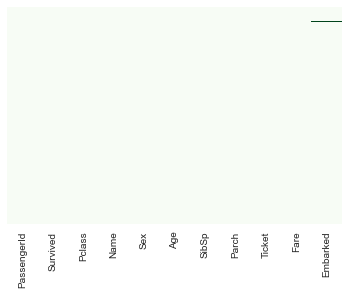

In [413]:
# plot the number of missing values for the whole dataset

sns.heatmap(train.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='Greens')

In [414]:
# drop all the others null values

train.dropna(inplace=True)

<AxesSubplot:>

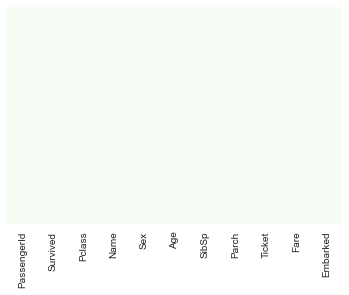

In [415]:
# plot the number of missing values for the whole dataset - this time it is finally ZERO

sns.heatmap(train.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='Greens')

### Dealing with Categorical Features

In [416]:
# convert categorical features to dummy variables

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [417]:
# convert using pandas

sex = pd.get_dummies(train['Sex'],
                     drop_first=True) # to avoid dummy variable trap
embark = pd.get_dummies(train['Embarked'],
                        drop_first=True) # to avoid dummy variable trap

In [418]:
# remove already encoded or unecessary variables (variables which are not adding any predicitive
# power how can  Ticket number or Name be)

train.drop(['Sex','Embarked','Name','Ticket'],
           axis=1,
           inplace=True)

In [419]:
# visualize removed varibales

train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [420]:
# add encoded variables to the dataset

train = pd.concat([train,sex,embark],
                  axis=1)

In [421]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


## Build the model - Attempt 1 - No feature Eng.

In [422]:
# split the data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), # drop the target variable
                                                    train['Survived'], 
                                                    test_size=0.25)

### 1. Logistic Regression

In [423]:
# import the model
from sklearn.linear_model import LogisticRegression

In [424]:
# train the model

logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train,
             y_train,
            )

LogisticRegression(max_iter=10000)

In [425]:
# get predictions

predictions = logmodel.predict(X_test)

In [426]:
# check the results of the model

from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       147
           1       0.71      0.71      0.71        76

    accuracy                           0.80       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223



### 2. Decision Tree

In [427]:
# pre processing of the data for the model

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [428]:
# build the decision tree model

from sklearn.tree import DecisionTreeClassifier

classifier_decision_tree = DecisionTreeClassifier(criterion = 'entropy', # most common, but not the default one
                                    random_state = 0)
classifier_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [429]:
# predict test results
y_pred = classifier_decision_tree.predict(X_test)

In [430]:
# get the score of results
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       147
           1       0.63      0.71      0.67        76

    accuracy                           0.76       223
   macro avg       0.73      0.75      0.74       223
weighted avg       0.77      0.76      0.76       223



### 3. Random Forrest

In [431]:
# build the random forrest model

from sklearn.ensemble import RandomForestClassifier

classifier_random_forrest = RandomForestClassifier(n_estimators = 30, 
                                                   criterion = 'entropy',  # most common, but not the default one
                                                   random_state = 0)
classifier_random_forrest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=0)

In [432]:
# predict test results
y_pred = classifier_random_forrest.predict(X_test)

In [433]:
# get the score of results
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       147
           1       0.74      0.72      0.73        76

    accuracy                           0.82       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.82      0.82      0.82       223



### 4. SVM

In [434]:
from sklearn.svm import SVC

classifier_svm = SVC(kernel = 'linear', 
                     random_state = 0)
classifier_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [435]:
# predict test results
y_pred = classifier_svm.predict(X_test)

In [436]:
# get the score of results
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       147
           1       0.70      0.66      0.68        76

    accuracy                           0.79       223
   macro avg       0.77      0.76      0.76       223
weighted avg       0.79      0.79      0.79       223



In [437]:
survived_pct = train[(train['Survived']==1)]['Survived'].count()/train['Survived'].count()

print(survived_pct)

0.38245219347581555


## Build the model - Part 2, with feature Eng.

In [796]:
# reload the dataset

test = "/Users/albertovisona/Desktop/Applications/MIT_xPRO/Projects/Titanic Data/titanic_test.csv"
train = "/Users/albertovisona/Desktop/Applications/MIT_xPRO/Projects/Titanic Data/titanic_train.csv"

train = pd.read_csv(train)
test = pd.read_csv(test)

In [797]:
# drop the unecessary data
# PassengerId does not contribute to the person survival rate

train = train.drop(['PassengerId'], axis=1)

In [798]:
# visualize incomplete data

train.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

### Feature Engineering

#### Cabin

In [799]:
# Cabin - this time instead of deleting the feature, we try a different pattern.

# Sine the cabin number has the following pattern ‘A123’, and the letter refers to the deck
# we can create a new feature which extracts the deck (and maps it to a numerical value)
# we will assing 0 to the records which are NaN

import re
deck = {"A": 1,
        "B": 2, 
        "C": 3, 
        "D": 4, 
        "E": 5, 
        "F": 6, 
        "G": 7, 
        "U": 8}

data = [train, test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0) # add zero when deck is not present
    dataset['Deck'] = dataset['Deck'].astype(int)
    
# drop the cabin feature as it is not needed
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,8


In [800]:
train['Deck'].unique()

array([8, 3, 5, 7, 4, 1, 2, 6, 0])

#### Age

In [801]:
# replace missing age with average age by Class

train['Age'] = train[['Age','Pclass']].apply(impute_age,
                                             axis=1,
                                             args = (mean_1, mean_2, mean_3)) # args of the function

In [802]:
# check that the function has been applied correctly

train["Age"].isnull().sum()

0

#### Embraked

In [803]:
# visualize Embarked data

train['Embarked'].describe()

# top is the most common record

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [804]:
# since just 2 values are missing, we will replace them with the most frequent record

common_value = 'S'
data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

#### SibSp and Parch

SibSp and Parch are essentially showing the same relationship, which is the family group. Thus, it makes more sense to combine the two in a single feature, that shows the total number of relatives, a person has on the Titanic.

In [805]:
# add a feature to get the total number of relatives
# add a feature to check if someone is alone or with relatives

data = [train, test]

for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
    
train['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

/opt/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/anaconda3/envs/py37/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


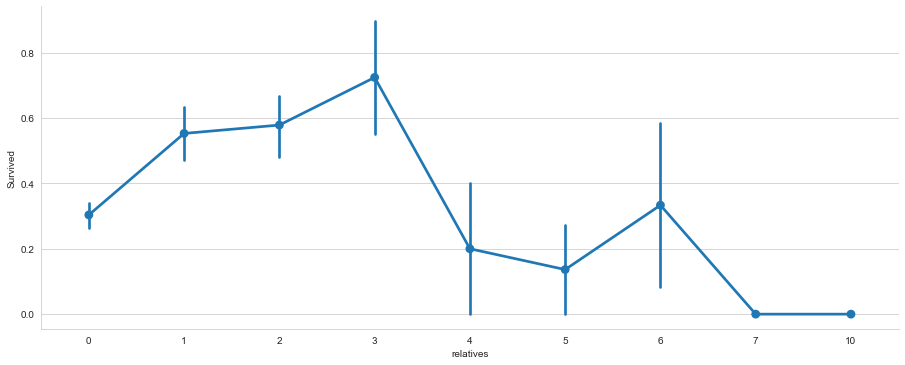

In [806]:
# visualize survival rate by # of relatives

axes = sns.factorplot('relatives','Survived', 
                      data=train, 
                      aspect = 2.5,)

#### Converting Features

In [807]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    float64
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  Deck       891 non-null    int64  
 11  relatives  891 non-null    int64  
 12  not_alone  891 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


#### Convert Fare to integer

In [808]:
# no need for float-level precision

data = [train, test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

#### Build Feature for Name

In [809]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

Names could be by itself an irrelevant feature for the forecasting of the survial rate. But if we look more in detail about the data, we can see how the Names are not a plain combination of Name and Surname, but they have also details around the title of a given person.

In [810]:
data = [train, test]
titles = {"Mr": 1, 
          "Miss": 2, 
          "Mrs": 3, 
          "Master": 4, 
          "Rare": 5} # for strange titles

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
    
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)

#### Convert Sex into Numeric

In [811]:
genders = {"male": 0, "female": 1}
data = [train, test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

#### Dropping ticket due too much variability

In [812]:
train['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [813]:
train = train.drop(['Ticket'], axis=1)
test = test.drop(['Ticket'], axis=1)

#### Convert Embarked feature into numeric

In [814]:
ports = {"S": 0, 
         "C": 1, 
         "Q": 2}

data = [train, test]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

#### Modified Data Set

In [815]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,relatives,not_alone,Title
0,0,3,0,22.0,1,0,7,0,8,1,0,1
1,1,1,1,38.0,1,0,71,1,3,1,0,3
2,1,3,1,26.0,0,0,7,0,8,0,1,2
3,1,1,1,35.0,1,0,53,0,3,1,0,3
4,0,3,0,35.0,0,0,8,0,8,0,1,1


### Create new categories for further feature Engineering

#### Divide age into buckets

In [816]:
data = [train, test]

for dataset in data:
    dataset['Age'] = dataset['Age'].fillna(0).astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# visualise the distribution of the age
train['Age'].value_counts()

3    242
6    148
4    137
5    133
2     92
1     71
0     68
Name: Age, dtype: int64

#### Divide Fare into bukets

In [817]:
# divide the data set into 6 bins
# we don't want to have all the data in 1 bucket

pd.qcut(train.Fare, q=6)

0      (-0.001, 7.0]
1      (52.0, 512.0]
2      (-0.001, 7.0]
3      (52.0, 512.0]
4         (7.0, 8.0]
           ...      
886      (8.0, 14.0]
887     (26.0, 52.0]
888     (14.0, 26.0]
889     (26.0, 52.0]
890    (-0.001, 7.0]
Name: Fare, Length: 891, dtype: category
Categories (6, interval[float64]): [(-0.001, 7.0] < (7.0, 8.0] < (8.0, 14.0] < (14.0, 26.0] < (26.0, 52.0] < (52.0, 512.0]]

In [818]:
data = [train, test]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7) & (dataset['Fare'] <= 8), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 8) & (dataset['Fare'] <= 14), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 14) & (dataset['Fare'] <= 26), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 26) & (dataset['Fare'] <= 52), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 52, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,relatives,not_alone,Title
0,0,3,0,2,1,0,0,0,8,1,0,1
1,1,1,1,5,1,0,5,1,3,1,0,3
2,1,3,1,3,0,0,0,0,8,0,1,2
3,1,1,1,5,1,0,5,0,3,1,0,3
4,0,3,0,5,0,0,1,0,8,0,1,1
5,0,3,0,3,0,0,1,2,8,0,1,1
6,0,1,0,6,0,0,4,0,5,0,1,1
7,0,3,0,0,3,1,3,0,8,4,0,4
8,1,3,1,3,0,2,2,0,8,2,0,3
9,1,2,1,1,1,0,4,1,8,1,0,3


### Create new features

#### Age and Travel Class

In [819]:
# multiply data and class
# it can help to identify young and wealthy people and viceversa
data = [train, test]

for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']
    
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,relatives,not_alone,Title,Age_Class
0,0,3,0,2,1,0,0,0,8,1,0,1,6
1,1,1,1,5,1,0,5,1,3,1,0,3,5
2,1,3,1,3,0,0,0,0,8,0,1,2,9
3,1,1,1,5,1,0,5,0,3,1,0,3,5
4,0,3,0,5,0,0,1,0,8,0,1,1,15


#### Fare per Person

In [820]:

data = [train, test]

for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1) # + 1 because each passenger has to count himself
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,relatives,not_alone,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,0,8,1,0,1,6,0
1,1,1,1,5,1,0,5,1,3,1,0,3,5,2
2,1,3,1,3,0,0,0,0,8,0,1,2,9,0
3,1,1,1,5,1,0,5,0,3,1,0,3,5,2
4,0,3,0,5,0,0,1,0,8,0,1,1,15,1
5,0,3,0,3,0,0,1,2,8,0,1,1,9,1
6,0,1,0,6,0,0,4,0,5,0,1,1,6,4
7,0,3,0,0,3,1,3,0,8,4,0,4,0,0
8,1,3,1,3,0,2,2,0,8,2,0,3,9,0
9,1,2,1,1,1,0,4,1,8,1,0,3,2,2


#### Remove redundant features

In [821]:
# remove Age as now it is redundant

#train = train.drop('Age',axis=1)
#test = test.drop('Age',axis=1)

# remove Fare as now it is redundant

#train = train.drop('Fare',axis=1)
#test = test.drop('Fare',axis=1)

## Building the model - Part 2 - with feature eng.

In [822]:
# split the data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), # drop the target variable
                                                    train['Survived'], 
                                                    test_size=0.25)

In [823]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,relatives,not_alone,Title,Age_Class,Fare_Per_Person
723,2,0,6,0,0,2,0,8,0,1,1,12,2
277,2,0,4,0,0,0,0,8,0,1,1,8,0
608,2,1,2,1,2,4,1,8,3,0,3,4,1
532,3,0,1,1,1,0,1,8,2,0,1,3,0
257,1,1,4,0,0,5,0,2,0,1,2,4,5


In [824]:
y_train.head()

723    0
277    0
608    1
532    0
257    1
Name: Survived, dtype: int64

### 1. Logisitc Regression

In [825]:
# import the model
from sklearn.linear_model import LogisticRegression

In [826]:
# train the model

logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train,
             y_train,
            )

LogisticRegression(max_iter=10000)

In [827]:
# get predictions

predictions = logmodel.predict(X_test)

In [828]:
# check the results of the model

from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       133
           1       0.83      0.76      0.79        90

    accuracy                           0.84       223
   macro avg       0.84      0.83      0.83       223
weighted avg       0.84      0.84      0.84       223



### 2. Decision Tree

In [829]:
# pre processing of the data for the model

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [830]:
# build the decision tree model

from sklearn.tree import DecisionTreeClassifier

classifier_decision_tree = DecisionTreeClassifier(criterion = 'entropy', # most common, but not the default one
                                    random_state = 0)
classifier_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [831]:
# predict test results
y_pred = classifier_decision_tree.predict(X_test)

In [832]:
# get the score of results
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       133
           1       0.81      0.71      0.76        90

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.82      0.82      0.81       223



### 3. Random Forrest

In [833]:
# build the random forrest model

from sklearn.ensemble import RandomForestClassifier

classifier_random_forrest = RandomForestClassifier(n_estimators = 100, 
                                                   criterion = 'entropy',  # most common, but not the default one
                                                   random_state = 0)
classifier_random_forrest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [834]:
# predict test results
y_pred = classifier_random_forrest.predict(X_test)

In [835]:
# get the score of results
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       133
           1       0.80      0.73      0.76        90

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.82      0.82      0.81       223



### 4. SVM

In [836]:
from sklearn.svm import SVC

classifier_svm = SVC(kernel = 'linear', 
                     random_state = 0)
classifier_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [837]:
# predict test results
y_pred = classifier_svm.predict(X_test)

In [838]:
# get the score of results
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       133
           1       0.81      0.76      0.78        90

    accuracy                           0.83       223
   macro avg       0.83      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223



### Test with Cross validation

In [839]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100,
                            criterion = 'entropy',  # most common, but not the default one
                            random_state = 0)

scores = cross_val_score(classifier_random_forrest, 
                         X_train, 
                         y_train, 
                         cv=10, 
                         scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.74626866 0.85074627 0.89552239 0.8358209  0.73134328 0.8358209
 0.80597015 0.8358209  0.72727273 0.81818182]
Mean: 0.8082767978290366
Standard Deviation: 0.05302862019839952


### Feature importance

With random forrest you can measure the relative importance of each feature.
Sklearn algorithm measures a features importance by looking at how much the nodes of a given feature reduce impurity on average (across all trees in the forest). 
It computes this score automatically for each feature after training and scales the results so that the sum of all importances is equal to 1.

In [840]:
importances = pd.DataFrame({'feature': train.drop('Survived',axis=1).columns,
                            'importance':np.round(classifier_random_forrest.feature_importances_,3)})

importances = importances.sort_values('importance',
                                      ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Title,0.152
Sex,0.141
Age_Class,0.101
Fare,0.092
Age,0.090
Deck,0.086
Pclass,0.074
Fare_Per_Person,0.071
relatives,0.057


In [841]:
train.drop('Survived',axis=1).columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Deck',
       'relatives', 'not_alone', 'Title', 'Age_Class', 'Fare_Per_Person'],
      dtype='object')

In [842]:
# check that the sum is computed correctly

importances.sum()

importance    1.0
dtype: float64

<AxesSubplot:xlabel='feature'>

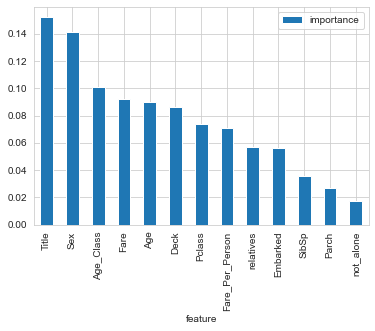

In [843]:
# visualize the importance features

importances.plot.bar()

### Retrain the Model with only significant features

In [844]:
# Drop the variables which are not meaningful 

train  = train.drop("not_alone", axis=1)
test  = test.drop("not_alone", axis=1)

train  = train.drop("Parch", axis=1)
test  = test.drop("Parch", axis=1)

In [845]:
# split the data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), # drop the target variable
                                                    train['Survived'], 
                                                    test_size=0.25)

In [846]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked,Deck,relatives,Title,Age_Class,Fare_Per_Person
0,0,3,0,2,1,0,0,8,1,1,6,0
1,1,1,1,5,1,5,1,3,1,3,5,2
2,1,3,1,3,0,0,0,8,0,2,9,0
3,1,1,1,5,1,5,0,3,1,3,5,2
4,0,3,0,5,0,1,0,8,0,1,15,1


#### Train the Random Forrest (Best Model in the previous iteration)

In [847]:
# build the random forrest model

from sklearn.ensemble import RandomForestClassifier

classifier_random_forrest = RandomForestClassifier(n_estimators = 100, 
                                                   criterion = 'entropy',  # most common, but not the default one
                                                   random_state = 0)
classifier_random_forrest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [848]:
# predict test results
y_pred = classifier_random_forrest.predict(X_test)

In [849]:
# get the score of results
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       124
           1       0.87      0.75      0.80        99

    accuracy                           0.84       223
   macro avg       0.84      0.83      0.83       223
weighted avg       0.84      0.84      0.84       223



### Final Comment

Performing data exploration, I was able to see very interesting and unexpected patterns like:

1. Survival rate higher for female than males
2. Survival rate for babies is higher than for kids (e.g. 3-10 years)
3. Survival of males is not related to age (but perhaps to something else, like positioning on the boat - this could potentially flag that not every part of the boat had the same safety measures)
4. First class had better safety measure or was firstly rescued


I ran the models (Logistic Regression, Decision Tree, Random Forrest and SVM) first without feature engineering and secondly with feature engineering and additional data pre-processing. Random Forrest has emerged as the best model in terms of performance when run without feature engineering, while logistic regression is the best model in terms of accuracy when some feature engineering has been performed.

Random Forrest is good even after performing a k-fold cross validation, basically confirming the accuracy value that was found in the single iteration of the model.

When talking about the goodness of this model, a crucial question comes into play. How do we define the success of this model? Is it the model with the best accuracy, or the model that can help us to understand better the root causes of this tragic event? In my opinion, the outcome of this model should be the interpretability of the outcomes. In fact, no model can bring back to life those who lost their lives in this dramatic even, but we need to study and understand what has caused this failure, and if a different strategy would have allowed to save more lives.

If we look at the f1 score of the model, we clearly see that the model is better at detecting people who will not survive that those who will. This is likely driven by the class imbalance in the dataset.

A good thing of the Random Forrest model is that it allows us to easily see the feature importance of the variables which have determined the given outcome of the model. The top 3 variables are the Title, the Sex and the feature engineered Age_class (which is amplifying the fact that older people can afford higher travel class).